# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The No Show Appointments dataset has information about the patient appointments in Brazil and is focused on analysing whether a patient would show up or not for their appointment.

>
> Research 1: We would be analysising what are the chances of a person belonging to lower age group (according to median), suffering from alcoholism, shows up for the appointment.

> Research 2: We would also like to analysis who is more favourable to show up from lower and higer age group if they posses a scholarship and has to wait for more than a day before thier appointment.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [131]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# checking the sample of dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [132]:
# Looking at the dataframe
df.shape

(110527, 14)

In [133]:
# looking at the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [134]:
# Summary statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#By looking at the summary statistics following major inferences could be made:
1.The majorty of people are in age group 20-70 as it has mean of 37 with a std of 23. 
2.There is one exception with age = -1 .
3. We are not comparing the rest of the variables as they are categorigal.

In [135]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

# Cleaning the dataset

> In the following steps we will make necessary changes in the dataset for making the data ready for analysis.
> Steps involved: Removing duplicates, formatting of the data sets, removing unwanted columns, spliting columns,etc.

In [136]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [137]:
# Removing duplicates if any

df.duplicated().sum()

0

The sum of zero means there are no duplicate values in my dataframe. But we do have a observation where age was equal to -1 which can't be possible so we are removing that particular observation as it doesn't make any sense.

In [138]:
# Removing the age = -1 row
df = df.drop(df.index[['Age'] == -1], axis = 0)
df.shape

(110526, 14)

In [139]:
#labeling every column name in lowercase

df.columns = df.columns.str.lower()
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


# Splitting the scheduledday and appointmentday column 

> Both the columns can be splitted by using 'T' as a separator which would help us to calculate the difference between the scheduded day and appointment day. Also we can rename them by putting '_' in mid for proper reading.

In [140]:
df.rename(columns = {'scheduledday' : 'scheduled_day', 'appointmentday' : 'appointment_day'}, inplace = True)

df.head(1)

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [141]:
df['scheduled_day'] = df.loc[:,'scheduled_day'].apply(lambda s: s.split('T')[0])
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [142]:
df['appointment_day'] = df.loc[:, 'appointment_day'].apply(lambda s: s.split('T')[0])
df.head()

,patientid,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No


## Dropping Columns

> Two columns patientid & appointmentid doesn't seem to be much important. Hence we can drop these column for better view of dataset. 

In [143]:
df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

In [144]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 1 to 110526
Data columns (total 12 columns):
gender             110526 non-null object
scheduled_day      110526 non-null object
appointment_day    110526 non-null object
age                110526 non-null int64
neighbourhood      110526 non-null object
scholarship        110526 non-null int64
hipertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handcap            110526 non-null int64
sms_received       110526 non-null int64
no-show            110526 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


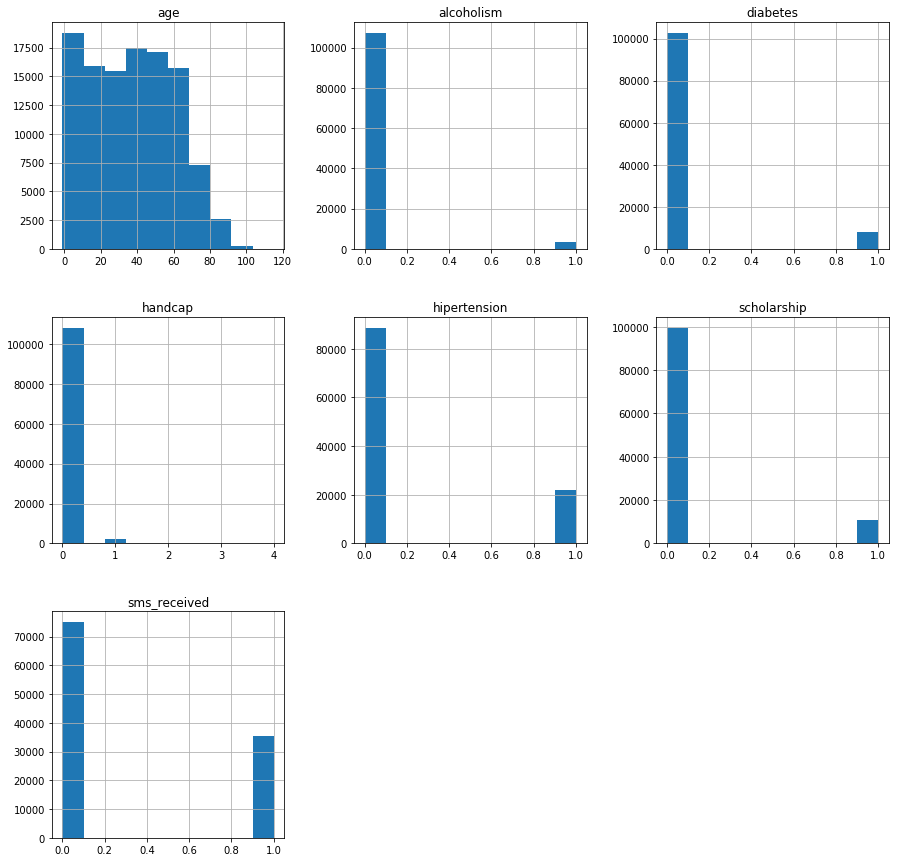

In [146]:
df.hist(figsize = (15,15));

# Final Steps

> Before we jump into exploration part it is important to make the below mentioned changes for analysis we want to do:
    1. Calculate the wait time
    2. Changing 'no_show' data to numerical format.

In [147]:
df['wait_day'] = pd.to_datetime(df['appointment_day']) - pd.to_datetime(df['scheduled_day'])

df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_day
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2 days


In [148]:
df['wait_day'] = df['wait_day'].apply(lambda x: x.days)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_day
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2


In [149]:
df['wait_day'].describe()


count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_day, dtype: float64

In [150]:
# Checking for negative wait day
df['wait_day'].value_counts()

 0      38562
 2       6725
 4       5290
 1       5213
 7       4906
 6       4037
 5       3277
 14      2913
 3       2737
 8       2332
 21      1861
 28      1706
 13      1682
 9       1605
 15      1503
 10      1391
 20      1187
 22      1173
 16      1151
 12      1115
 17      1107
 29      1089
 19      1044
 18      1021
 27      1013
 11       987
 35       963
 23       822
 34       808
 26       731
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: wait_day, Length: 131, dtype: int64

In [151]:
# Selecting the valid data
df = df.query('wait_day >= 0')
df.shape

(110521, 13)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 1 to 110526
Data columns (total 13 columns):
gender             110521 non-null object
scheduled_day      110521 non-null object
appointment_day    110521 non-null object
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hipertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handcap            110521 non-null int64
sms_received       110521 non-null int64
no-show            110521 non-null object
wait_day           110521 non-null int64
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


In [153]:
df['no-show'] =df['no-show'].str.lower().replace({'yes' : 1, 'no' : 0})
df.head(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_day
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2
8,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0,0
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0,2
10,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0,2


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 1 to 110526
Data columns (total 13 columns):
gender             110521 non-null object
scheduled_day      110521 non-null object
appointment_day    110521 non-null object
age                110521 non-null int64
neighbourhood      110521 non-null object
scholarship        110521 non-null int64
hipertension       110521 non-null int64
diabetes           110521 non-null int64
alcoholism         110521 non-null int64
handcap            110521 non-null int64
sms_received       110521 non-null int64
no-show            110521 non-null int64
wait_day           110521 non-null int64
dtypes: int64(9), object(4)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### We would be analysising whether the patient who registered under alcoholism showed up for the appointment or not .

# Checking for Outlier

> Before we calculate the median for age it is necessary to check for an outlier

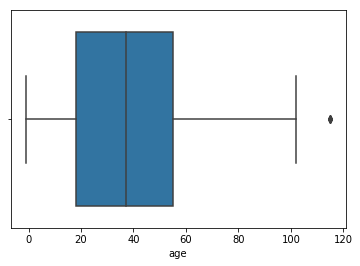

In [155]:
import seaborn as sns

sns.boxplot(df['age']);

> The data for age looks good with only 1 value(115) outside the IQR that is also acceptable as person can be 115 years old. 

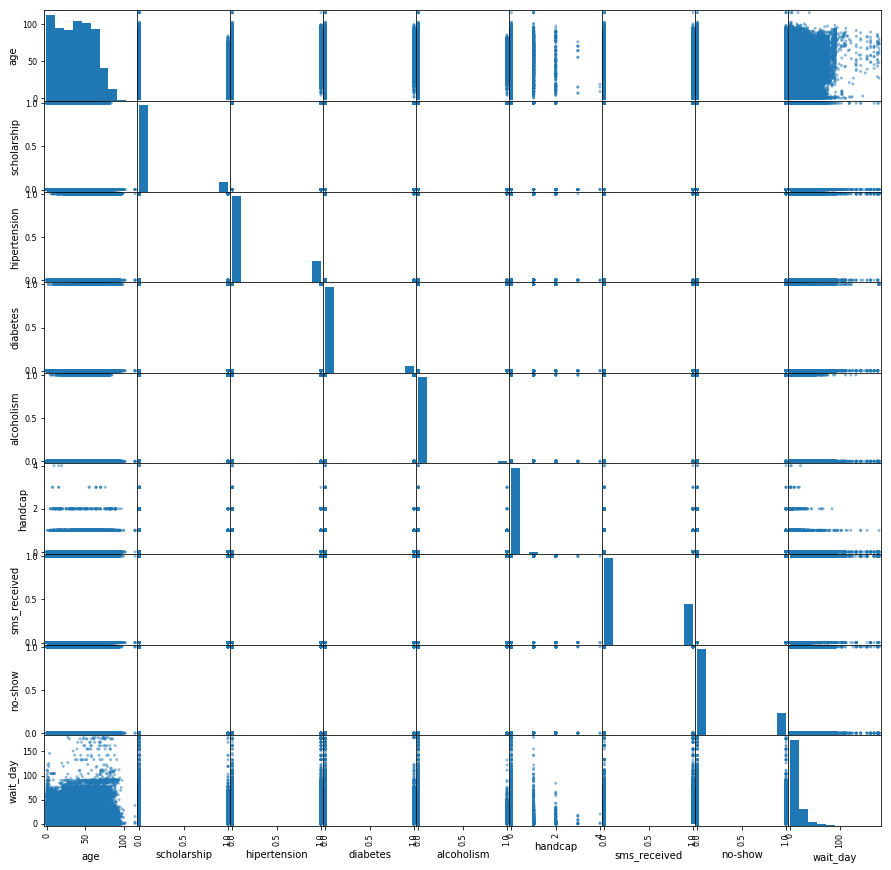

In [156]:
# Overview of the full data

pd.plotting.scatter_matrix(df, figsize = (15,15));

> As most of the data is categorical we are not able reach any major inference. 
> To get the desired output we have to summarize the data for different categories.

In [157]:
# Selecting data for patient registered under alcoholism
alcoholism_df = df.query('alcoholism == 1')
no_show_alcoholism = alcoholism_df.groupby(['alcoholism','no-show'])['no-show'].count()

Text(0, 0.5, 'Count')

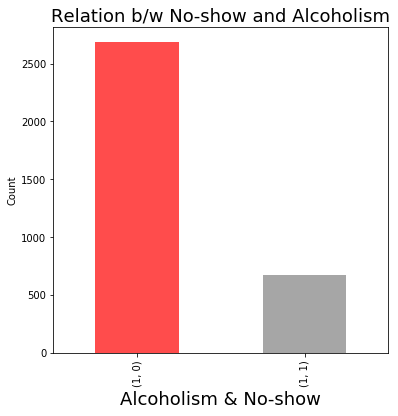

In [158]:
# Plotting the graph to view the desired output
no_show_alcoholism.plot(kind = 'bar', color = ['red', 'grey'], alpha = 0.7, figsize = (6,6));
plt.title('Relation b/w No-show and Alcoholism', fontsize = 18)
plt.xlabel('Alcoholism & No-show', fontsize = 18)
plt.ylabel('Count')

> From the plot we can infer that a good ratio of count who were appointed for Alcoholism showed up at the day of appointment as compared to those who didn't showed up (count near 500). 

In [159]:
# Checking whether wait_day is the reason or not
alcoholism_df.groupby(['no-show'])['wait_day'].mean()

no-show
0     5.371972
1    12.782866
Name: wait_day, dtype: float64

> from the above output it can be predicted that wait_day can be a reason for a patient not showing up at the day of appointment

### Research Question 2 : To check which are the top most five neighbourhood city which doesnot show up for the appointment.

In [160]:
# Grouping the Neighbourhood data as 'nh_df' and arranging them 
nh_df = df.groupby(['neighbourhood']).sum()['no-show']
nh_df = nh_df.sort_values(ascending = False).head(5)


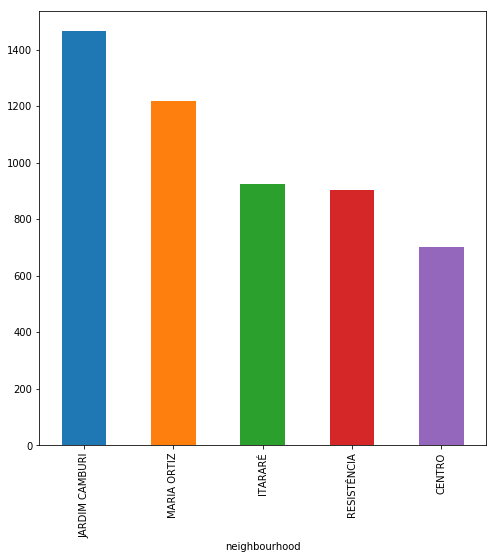

In [161]:
# Plotting the graph for top 5 neighbourhood
nh_df.plot(kind = 'bar', figsize = (8,8))
plt.title('')
plt.show()

> The plot above gives us a fair idea of top five neighbourhood who didn't showed up for the appointment.

# Little more analysis 
> Research 3: Out of alcoholism, hipertension and diabetes which is most common reason for which patient shows up on appointment day.

In [162]:
df_no_show = df.groupby(['no-show'])['alcoholism','diabetes','hipertension'].sum().reset_index()
df_most_appointment = df_no_show.loc[0,['alcoholism', 'diabetes', 'hipertension']]

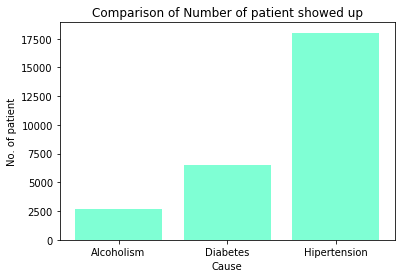

In [163]:
locations = [1,2,3]
labels = ['Alcoholism', 'Diabetes', 'Hipertension']
plt.bar(locations, df_most_appointment, tick_label = labels, color = 'aquamarine')
plt.title('Comparison of Number of patient showed up')
plt.xlabel('Cause')
plt.ylabel('No. of patient')
plt.show();

> The plot clearly confirms that the maximum patient who showed-up are under Hipertension, followed by Diabetes and at last by Alcoholism.

# Research 4

> Does average wait day have an impact on showing up of the patient on the day of appointment? 

> We will be evaluting the data by taking median as average value because mean can result in skewness of data.

In [164]:
# Calculating the median of the wait_day
median_wait_day = df['wait_day'].median()
median_wait_day

4.0

In [165]:
# Creating group on the basis of median_wait_Day
less_wait_day = df.query('wait_day <= {}'.format(median_wait_day))
more_wait_day = df.query('wait_day < {}'.format(median_wait_day))

In [166]:
#Checking the shape of both the dataframe
less_wait_day.shape

(58527, 13)

In [167]:
more_wait_day.shape

(53237, 13)

In [168]:
# Evaluating the value of no-show
less_wait_day_ns = less_wait_day['no-show'].sum()
more_wait_day_ns = more_wait_day['no-show'].sum()

In [169]:
#checking the sum
print(less_wait_day_ns)
print(more_wait_day_ns)

6382
5151


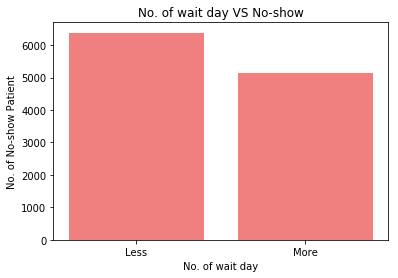

In [170]:
#Plotting a graph for above observation
locations = [1,2]
heights = [less_wait_day_ns, more_wait_day_ns]
labels = ['Less', 'More']
plt.bar(locations, heights, tick_label = labels, color = 'lightcoral')
plt.title('No. of wait day VS No-show')
plt.xlabel('No. of wait day')
plt.ylabel('No. of No-show Patient')
plt.show();

> The output of the plot doesn't show a major difference on whether a person showing up is dependent on average wait day by median.


In [171]:
# Creating a dataset for checking no-show count per wait-day
wait_day_ns = df.groupby(['wait_day']).sum()['no-show']
wait_day_ns.head()

wait_day
0    1792
1    1113
2    1602
3     644
4    1231
Name: no-show, dtype: int64

Text(0.5, 1.0, 'No. Show As Wait Day Increases')

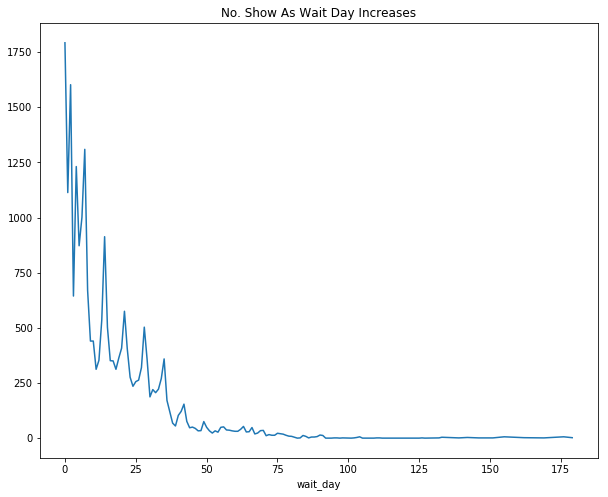

In [172]:
#ploting a trend graph for above dataframe
wait_day_ns.plot(figsize = (10,8));
plt.title('No. Show As Wait Day Increases')

> The trend line of graph indicates that there is a clear relation between Number of patient not showing up and the number of days the patient has to wait for appointment.

<a id='conclusions'></a>
## Conclusions
> The analysis of the dataframe has resulted in a quite of finding and results, few of which are mentioned below:
> 1. The outlier can be only indentified if you have knowledge of the data.
> 2. A good number of patient appeared for their appointment who were registered under Alcoholism.
> 3. We also got a clear idea of which are the top 5 neighbourhood who didn't showed up for the appointment.
> 4. One of the plot also helped us to conclude that: The maximum patient who showed-up are under Hipertension, followed by Diabetes and at last by Alcoholism.
> 5. Lastly we also found that the number of waiting days (wait_day) is one of the major reason behind patient not showing up on the day of appointment.
